# Bertrand PAUTET

# Devoir Python

Vous devez rendre votre devoir sur GitHub.
Vous avez le droit a tout vos documents et a internet

1. votre depot doit etre privé
2. vous devez inviter comme colaborateur votre chargé de TD/TP
3. Seul le dernier commit avant la fin de la séance sera corrigé.


Ex 1: Integrale de Romberg

Ecrire une fonction integ_romberg(f, a, b, epsilon=1e-6) permettant de calculer l’intégrale numérique de la fonction f entre les bornes a et b avec une précision epsilon selon la méthode de Romberg (https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Romberg).

Il s’agit d’une méthode qui permet d’améliorer les méthodes usuelles de calcul numérique des intégrales, comme la méthode des Trapèzes.
On montre qu’en combinant judicieusement les valeurs obtenues par la méthode des Trapèzes pour différentes subdivisons de l’intervalle d’intégration, on augmente l’ordre de convergence (sa vitesse de convergence). 


In [6]:
#Ex1 : on utilise les fonctions de numpy/scipy
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html
import numpy as np
import scipy
def integ_romberg(f, a, b, epsilon=1e-6):
    return scipy.integrate.romberg(f, a, b, rtol=epsilon)#on ajoute notre tolérance relative passée en paramètre
fex1 = lambda x : x**2
integ_romberg(fex1, 0, 1)

0.3333333333333333

Ex 2: Équation d’état de l’eau à partir de la dynamique moléculaire

Afin de modéliser les planètes de type Jupiter, Saturne, ou même des exo-planètes très massives (dites « super-Jupiters »), la connaissance de l’équation d’état des composants est nécessaire. Ces équations d’état doivent être valables jusqu’à plusieurs centaines de méga-bar ; autrement dit, celles-ci ne sont en aucun cas accessibles expérimentalement. On peut cependant obtenir une équation d’état numériquement à partir d’une dynamique moléculaire.

Le principe est le suivant : on place dans une boite un certain nombre de particules régies par les équations microscopiques (Newton par exemple, ou même par des équations prenant en considération la mécanique quantique) puis on laisse celles-ci évoluer dans la boite ; on calcule à chaque pas de temps l’énergie interne à partir des intéractions électrostatiques et la pression à partir du tenseur des contraintes. On obtient en sortie l’évolution du système pour une densité fixée (par le choix de taille de la boite) et une température fixée (par un algorithme de thermostat que nous ne détaillerons pas ici).

On se propose d’analyser quelques fichiers de sortie de tels calculs pour l’équation d’état de l’eau à très haute pression. Les fichiers de sortie sont disponibles ici; leur nom indique les conditions thermodynamiques correspondant au fichier, p.ex. 6000K_30gcc.out pour T=6000
K et ρ=30 gcc. Le but est, pour chaque condition température-densité, d’extraire l’évolution de l’énergie et de la pression au cours du temps, puis d’en extraire la valeur moyenne ainsi que les fluctuations. Il arrive souvent que l’état initial choisi pour le système ne corresponde pas à son état d’équilibre, et qu’il faille donc « jeter » les quelques pas de temps en début de simulation qui correspondent à cette relaxation du système. Pour savoir combien de temps prend cette relaxation, il sera utile de tracer l’évolution au cours du temps de la pression et l’énergie pour quelques simulations. Une fois l’équation d’état P(ρ,T) et E(ρ,T) extraite, on pourra tracer le réseau d’isothermes.

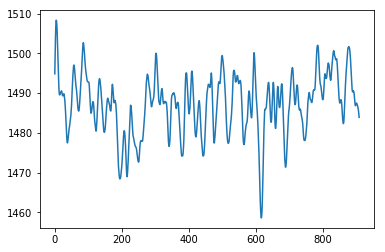

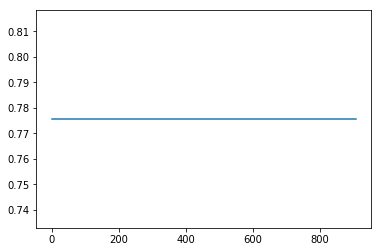

In [92]:
#Ex2
import matplotlib.pyplot as plt
import os
files = [f for f in os.listdir('./outputs/') if os.path.isfile(f)]#On liste tous les fichiers de condition température-densité
datas = []
"""for f in files:
#On load le fichier en ignorant la premiere ligne et en castant les champ en float(f4) 
    data = np.loadtxt('files', dtype={'names': ('Potential_energy', 'Kinetic_Energy', 'Pressure'),
                    'formats': ('f4', 'f4', 'f4')}, skiprows=1)
    Poe = np.array([line[0]for line in data])#on construit l'array de l'énergie potentiel
    Ke = np.array([line[1]for line in data])#on construit l'array de l'énergie cinétique
    Pr = np.array([line[2]for line in data])#on construit l'array de la pression
    tmp = np.array([Poe, Ke, Pr])
    datas.append(tmp)#On ajoute ce fichier à l'array datas qui contient tout
print(len(datas))"""#Ne marche pas
data = np.loadtxt('./outputs/6000K_07gcc.out', dtype={'names': ('Potential_energy', 'Kinetic_Energy', 'Pressure'),
                    'formats': ('f4', 'f4', 'f4')}, skiprows=1)
Poe = np.array([line[0]for line in data])#on construit l'array de l'énergie potentiel
Ke = np.array([line[1]for line in data])#on construit l'array de l'énergie cinétique
Pr = np.array([line[2]for line in data])#on construit l'array de la pression
plt.autoscale(enable=True, axis='both', tight=None)
plt.plot(Pr)#On veut seulement la pression
plt.figure()
plt.autoscale(enable=True, axis='both', tight=None)
plt.plot(Ke)#On veut seulement l'énergie cinétique
plt.show()

Ex 3: Le problème du voyageur de commerce

Le problème du voyageur de commerce est un problème d’optimisation consistant à déterminer le plus court chemin reliant un ensemble de destinations. Il n’existe pas d’algorithme donnant la solution optimale en un temps raisonnable (problème NP-complet), mais l’on peut chercher à déterminer des solutions approchées. On va se placer ici dans le cas d’un livreur devant desservir une seule fois chacune desndestinations d’une ville américaine où les rues sont agencées en réseau carré. 

On utilise la « distance deManhattan »  entre deux points 𝐴(𝑥𝐴,𝑦𝐴) et 𝐵(𝑥𝐵,𝑦𝐵) : 𝑑(𝐴,𝐵) =|𝑥𝐵−𝑥𝐴|+|𝑦𝐵−𝑦𝐴|.

En outre, on se place dans le cas où les coordonnées des destinations sont entières, comprises entre 0 (inclus) et TAILLE = 50 (exclus). Deux destinations peuvent éventuellement avoir les mêmes coordonnées. Les instructions suivantes doivent permettre de définir les classes nécessaires (Ville et Trajet) et de développer un algorithme approché (heuristiques) : l’algorithme du plus proche voisin. 

Seules la librairie standard et la librairie numpy sont utilisables si nécessaire. Implementer les classes et methodes suivante:


Classe Ville:
* __init__(): initialisation d’une ville sans destination.
* aleatoire(n): création de n destinations aléatoires.
* nb_trajet(): retourne le nombre total (entier) de trajets :(𝑛−1)!/2(utilisermath.factorial()).
* distance(i, j): retourne la distance (Manhattan) entre les deux destinations de numéro i et j


Classe Trajet:
* __init__(ville, etapes=None): initialisation sur une ville. Si la liste etapes n’est pas spécifiée, le trajet par défaut est celui suivant les destinations de ville.
* longueur(): retourne la longueur totale du trajetbouclé(i.e. revenant à son point de départ).


Plus proche voisin:
* Ville.plus_proche(i, exclus=[]): retourne la destination la plus proche de la destinationi(au sens de Ville.distance()), hors les destinations de la liste exclus
* Ville.trajet_voisins(depart=0): retourne un Trajet déterminé selon l’heuristique des plus proches voisins (i.e. l’étape suivante est la destination la plus proche hors les destinations déjà visitées) en partant de l’étape initiale depart

Optimisation:
* Proposer un algorithme qui propose une meilleur alternative au "plus proche voisin".

Interface:
* Ville.figure(trajet=None): Afficher le plande la ville et le trajet obtenue (utiliser matplotlib.step()pour des trajets de type « Manhattan »)

In [103]:
from __future__ import division

import math
import numpy as N

import matplotlib.pyplot as P

N.random.seed(123)
TAILLE = 50

class Ville(object):

    def __init__(self):
        """Initialisation d'une ville sans destination."""

        self.destinations = N.array([]).reshape(-1, 2)

    def __str__(self):

        return "Ville: "+len(self.destinations)+" destinations ("+self.nb_trajets()+" trajets)"

    def aleatoire(self, n=20):
        """Création de *n* destinations aléatoires."""

        self.destinations = N.random.randint(TAILLE, size=(n, 2))

    def lecture(self, nomfichier="ville.dat"):
        """
        Lecture d'un fichier ASCII donnant les coordonnées des destinations.
        """

        try:
            self.destinations = N.loadtxt(nomfichier, dtype=int)
            if self.destinations.ndim != 2 or self.destinations.shape[1] != 2:
                raise IOError
        except IOError:
            raise IOError("Le fichier {!r} est invalide".format(nomfichier))

    def ecriture(self, nomfichier="ville.dat"):
        """
        Écriture d'un fichier ASCII avec les coordonnées des destinations.
        """

        N.savetxt(nomfichier, self.destinations, fmt='%d')

    def nb_trajets(self):
        """Retourne le nombre total (entier) de trajets: (n-1)!/2."""

        ndest = len(self.destinations)
        if ndest > 2:
            return int(math.factorial(ndest - 1) / 2)
        elif ndest > 0:
            return 1
        else:
            return 0

    def distance(self, i, j):
        """
        Retourne la distance Manhattan-L1 entre les destinations numéro
        *i* et *j*.
        """

        return N.abs(self.destinations[i] - self.destinations[j]).sum()

    def plus_proche(self, i, exclus=[]):
        """
        Retourne la destination la plus proche de la destination *i*, hors les
        destinations de la liste `exclus`.
        """

        voisins = [ j for j in range(len(self.destinations))
                    if j != i and j not in exclus ]
        distances = [ self.distance(i, j) for j in voisins ]

        return voisins[N.argmin(distances)]

    def trajet_voisins(self, depart=0):
        """
        Retourne un `Trajet` déterminé selon l'heuristique des plus proches
        voisins (i.e. l'étape suivante est la destination la plus proche hors
        les destinations déjà visitées) en partant de l'étape initiale
        `depart`.
        """

        ndest = len(self.destinations)
        if depart is None:     # Boucle sur tous les départs possibles
            trajets = [ self.trajet_voisins(depart=i) for i in range(ndest) ]
            longueurs = [ t.longueur() for t in trajets ]

            return trajets[N.argmin(longueurs)]
        else:                  # Départ imposé
            etapes = [depart]
            while len(etapes) < ndest:
                i = etapes[-1]
                j = self.plus_proche(i, exclus=etapes[:-1])
                etapes.append(j)

            return Trajet(self, etapes)

    def optimisation_trajet(self, trajet):
        """
        Retourne le trajet le plus court de tous les trajets « voisins » à
        `trajet` (i.e. résultant d'une simple interversion de 2 étapes).
        """

        ndest = len(self.destinations)
        trajets = [ trajet.interversion(i, j)
                    for i in range(ndest) for j in range(i+1, ndest) ]
        longueurs = [ t.longueur() for t in trajets ]
        opt = trajets[N.argmin(longueurs)]
        if opt.longueur() > trajet.longueur():
            opt = trajet

        return opt

    def trajet_opt2(self, trajet=None, maxiter=100):
        """
        À partir d'un `trajet` initial (par défaut le trajet des plus proches
        voisins), retourne un `Trajet` optimisé de façon itérative par
        interversion successive de 2 étapes.  Le nombre maximum d'itération est
        `maxiter`.
        """

        if trajet is None:
            trajet = self.trajet_voisins()

        for i in range(maxiter):
            opt = self.optimisation_trajet(trajet)
            if opt.longueur() == trajet.longueur():
                break
            else:
                trajet = opt

        return opt

    def figure(self, trajet=None, ax=None, offset=0):
        """
        Visualisation d'une ville et d'un trajet.
        """

        if ax is None:
            fig = P.figure(figsize=(6,6))
            ax = fig.add_subplot(1,1,1, aspect='equal',
                                 xlim=(0, TAILLE), ylim=(0, TAILLE),
                                 title="{} destinations".format(
                                     len(self.destinations)))
            minor_loc = P.matplotlib.ticker.MultipleLocator(1)
            ax.xaxis.set_minor_locator(minor_loc)
            ax.yaxis.set_minor_locator(minor_loc)
            ax.autoscale(False)

        if trajet is None:
            ax.plot(self.destinations[:, 0], self.destinations[:, 1],
                    'ko', zorder=10)
            for i,(x,y) in enumerate(self.destinations):
                #ax.text(x, y, ' '+str(i))
                ax.annotate(str(i), xy=(x, y), xytext=(x+0.5, y+0.5), zorder=10)
        else:
            boucle = N.concatenate((trajet.etapes, [trajet.etapes[0]]))
            ax.step(self.destinations[boucle, 0] + offset,
                    self.destinations[boucle, 1] + offset,
                    label="L={}".format(trajet.longueur()))

        return ax


class Trajet(object):

    """
    Trajet, contient une liste ordonnée des destinations (étapes) d'une
    Ville.
    """

    def __init__(self, ville, etapes=None):
        """
        Initialisation sur une `ville`.  Si `etapes` n'est pas spécifié, le
        trajet par défaut est celui suivant les destinations de `ville`.
        """

        assert isinstance(ville, Ville)
        self.ville = ville
        if etapes is None:                     # Trajet par défaut
            self.etapes = N.arange(len(self.ville.destinations))
        else:
            self.etapes = N.array(etapes)

    def __str__(self):

        return len(self.etapes)+"-trajet L="+self.longueur()+": "+self.etapes

    def longueur(self):
        """
        Retourne la longueur totale du trajet *bouclé* (i.e. revenant à son
        point de départ).
        """

        l = sum( self.ville.distance(self.etapes[i], self.etapes[i+1])
                 for i in range(len(self.etapes)-1) )
        l += self.ville.distance(self.etapes[-1], self.etapes[0])

        return l

    def interversion(self, i, j):
        """
        Retourne un nouveau `Trajet` résultant de l'interversion des 2 étapes
        *i* et *j*.
        """

        etapes = self.etapes.copy()
        etapes[[i, j]] = etapes[[j, i]]

        return Trajet(self.ville, etapes)


def fig_velocimetrie(nomfichier="velocimetrie.dat"):
    """
    Corrigé de l'exercice 1, en utilisant `pyplot`, l'API-OO de matplotlib.
    """

    # Lecture du fichier d'entrée, en sautant la 1ère ligne
    t, vel = N.loadtxt(nomfichier, skiprows=1, unpack=True)

    dt = t[1] - t[0]            # Pas de temps [ms]
    assert N.allclose(N.diff(t), dt), "Échantillonage en temps non-uniforme"

    fig = P.figure()

    # 1er axe: v(t)
    ax1 = fig.add_subplot(3, 1, 1,
                          ylabel="Vitesse [mm/s]",
                          title=nomfichier)
    ax1.plot(t, vel)

    # 2nd axe: x(t)
    ax2 = fig.add_subplot(3, 1, 2,
                          ylabel=u"Déplacement [µm]")
    ax2.plot(t, N.cumsum(vel) * dt)

    # 3ème axe: a(t)
    ax3 = fig.add_subplot(3, 1, 3,
                          xlabel="Temps [ms]",
                          ylabel=u"Accélération [m/s²]")
    tmid = 0.5 * (t[1:] + t[:-1])
    ax3.plot(tmid, N.diff(vel) / dt)

    return fig

